In [33]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [34]:
# load dataset
dta = sm.datasets.fair.load_pandas().data

# add "affair" column: 1 represents having affairs, 0 represents not
dta['affair'] = (dta.affairs > 0).astype(int)

In [35]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [4]:
dta.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991,1.000000


In [5]:
dta["children"].value_counts()

0.0    2414
2.0    1481
1.0    1159
3.0     781
4.0     328
5.5     203
Name: children, dtype: int64

In [6]:
dta.groupby('affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


In [36]:
dta["affair time ratio"]=dta["affairs"]/dta["yrs_married"]

In [10]:
dta.groupby('affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair time ratio
affair,,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243,0.709236


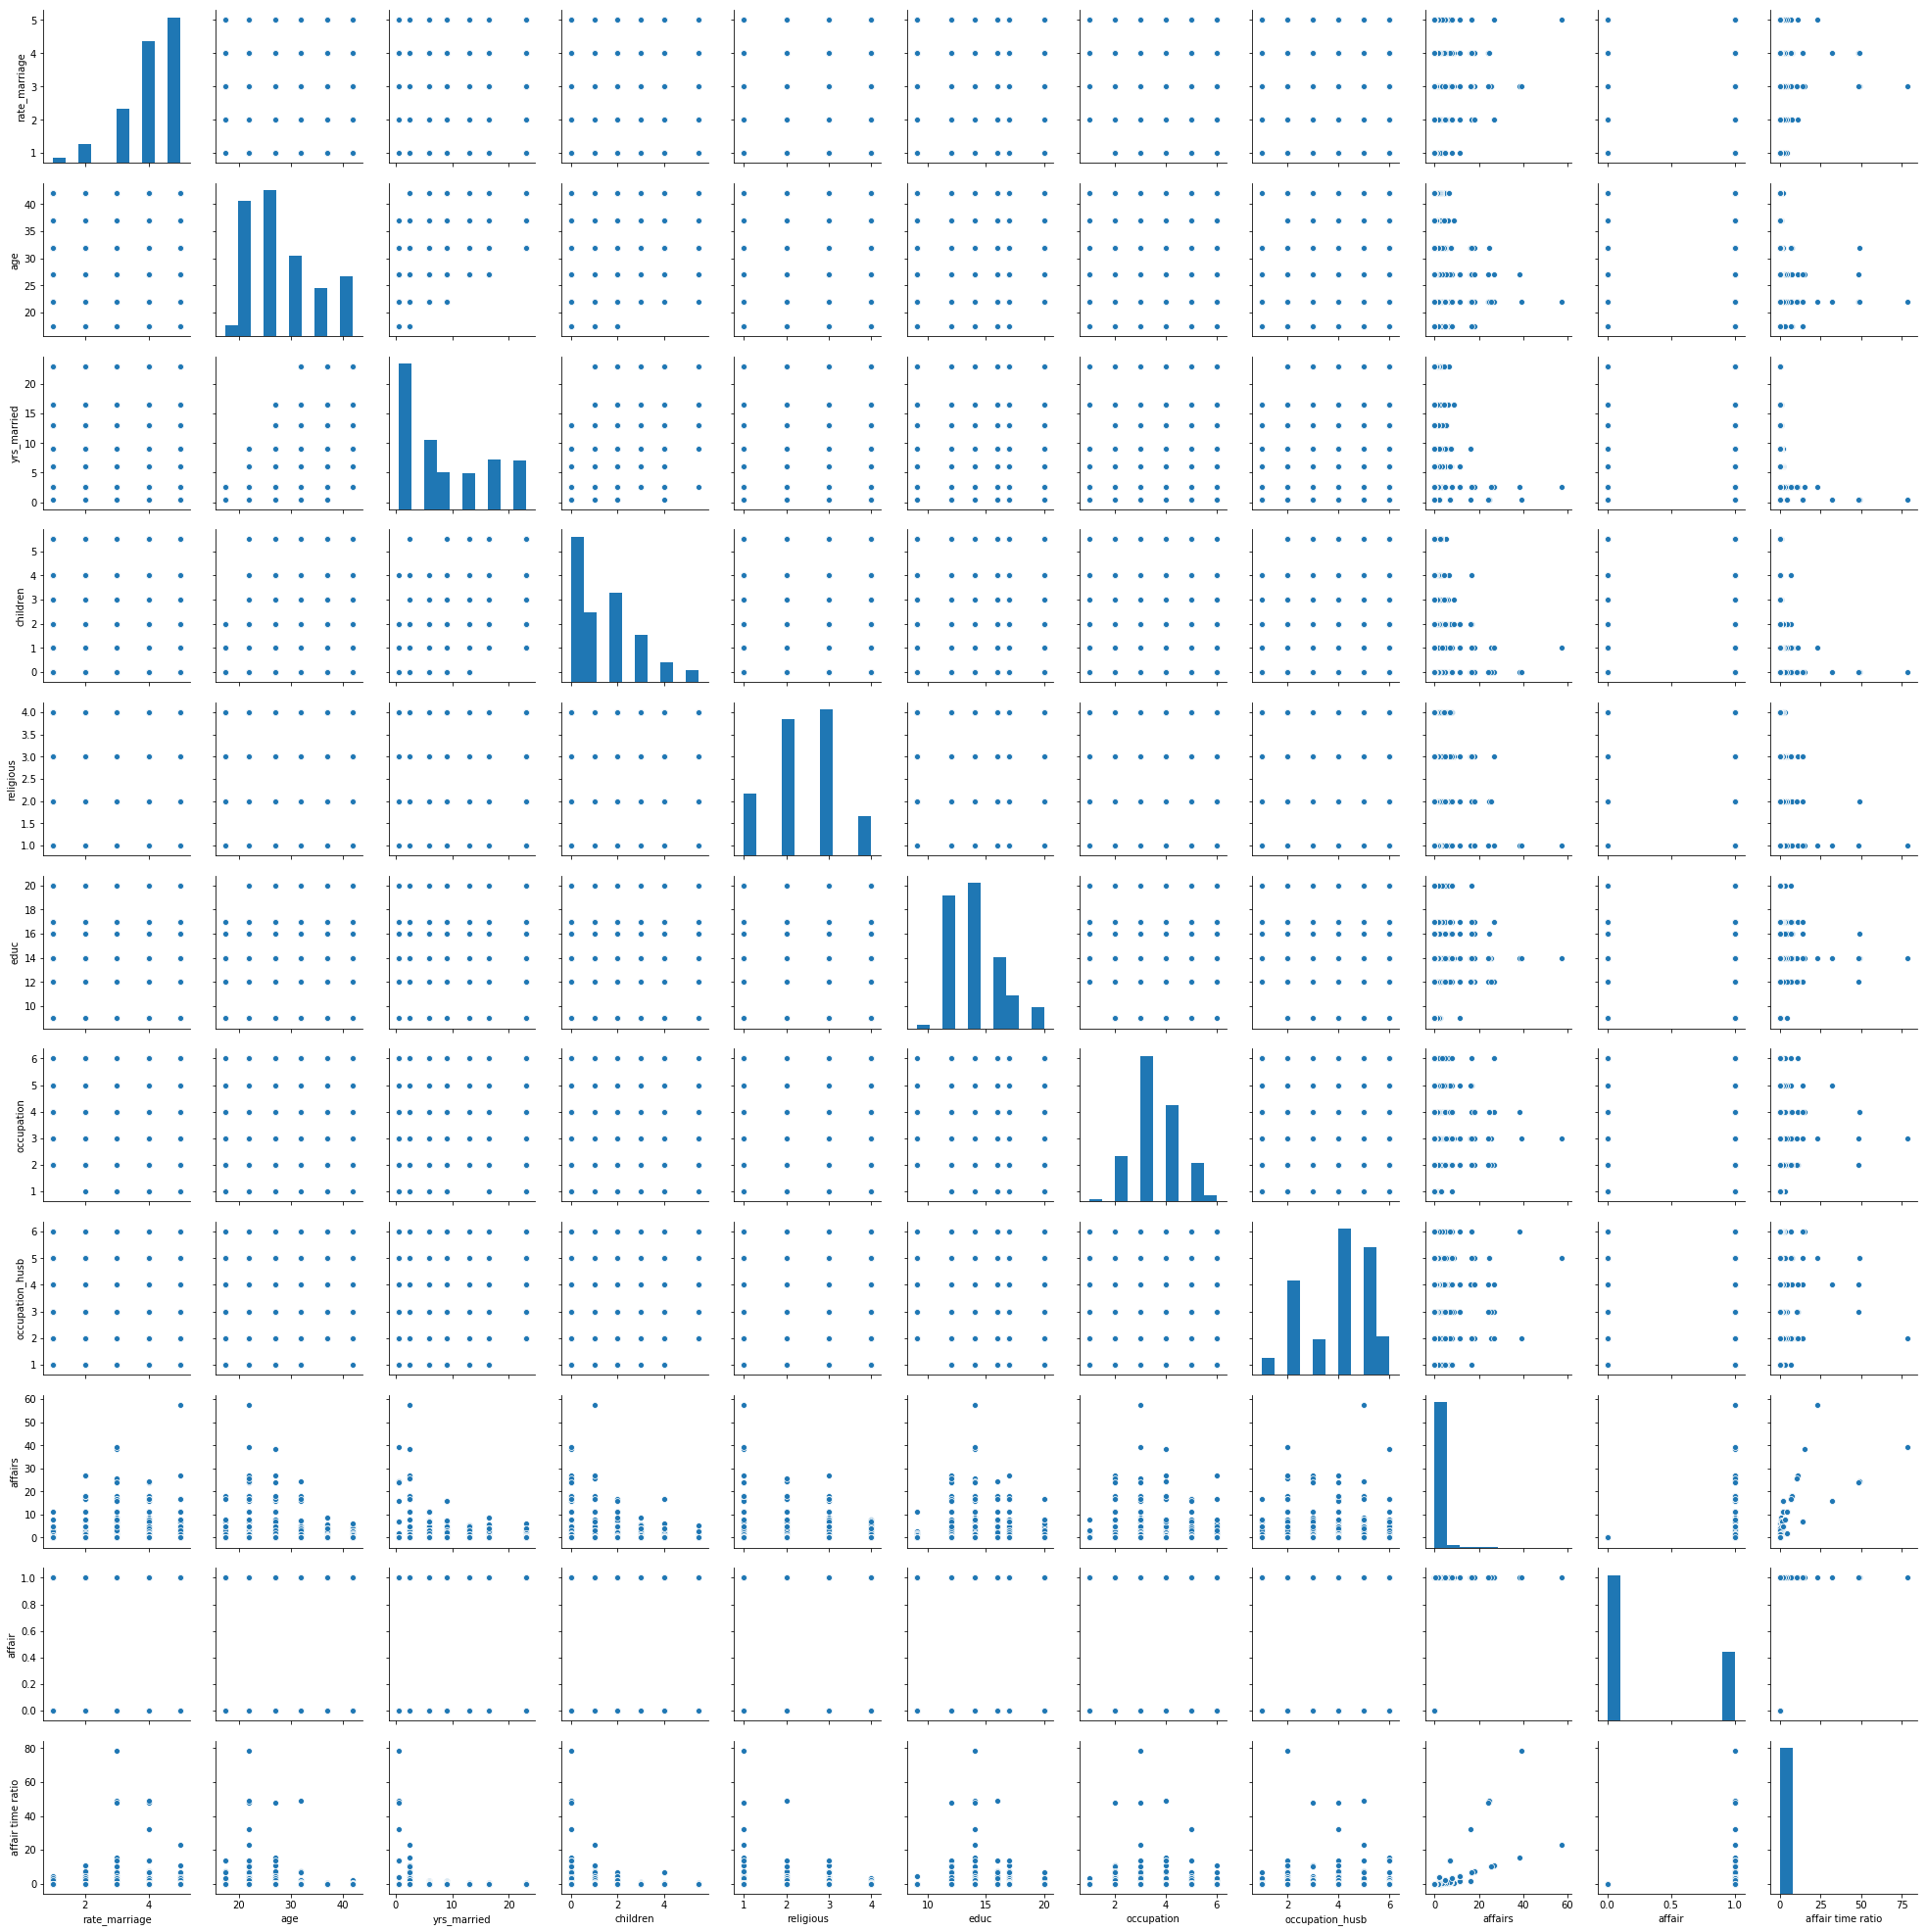

In [12]:
sns.pairplot(dta)

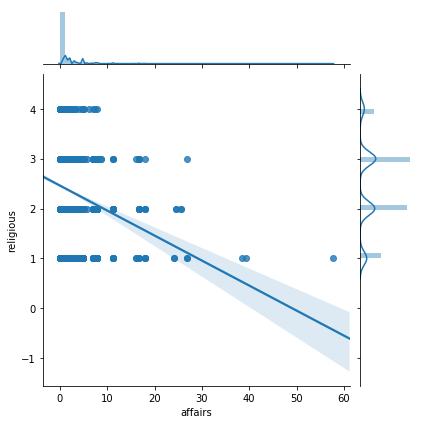

In [15]:
sns.jointplot(dta["affairs"],dta["religious"],kind="reg")

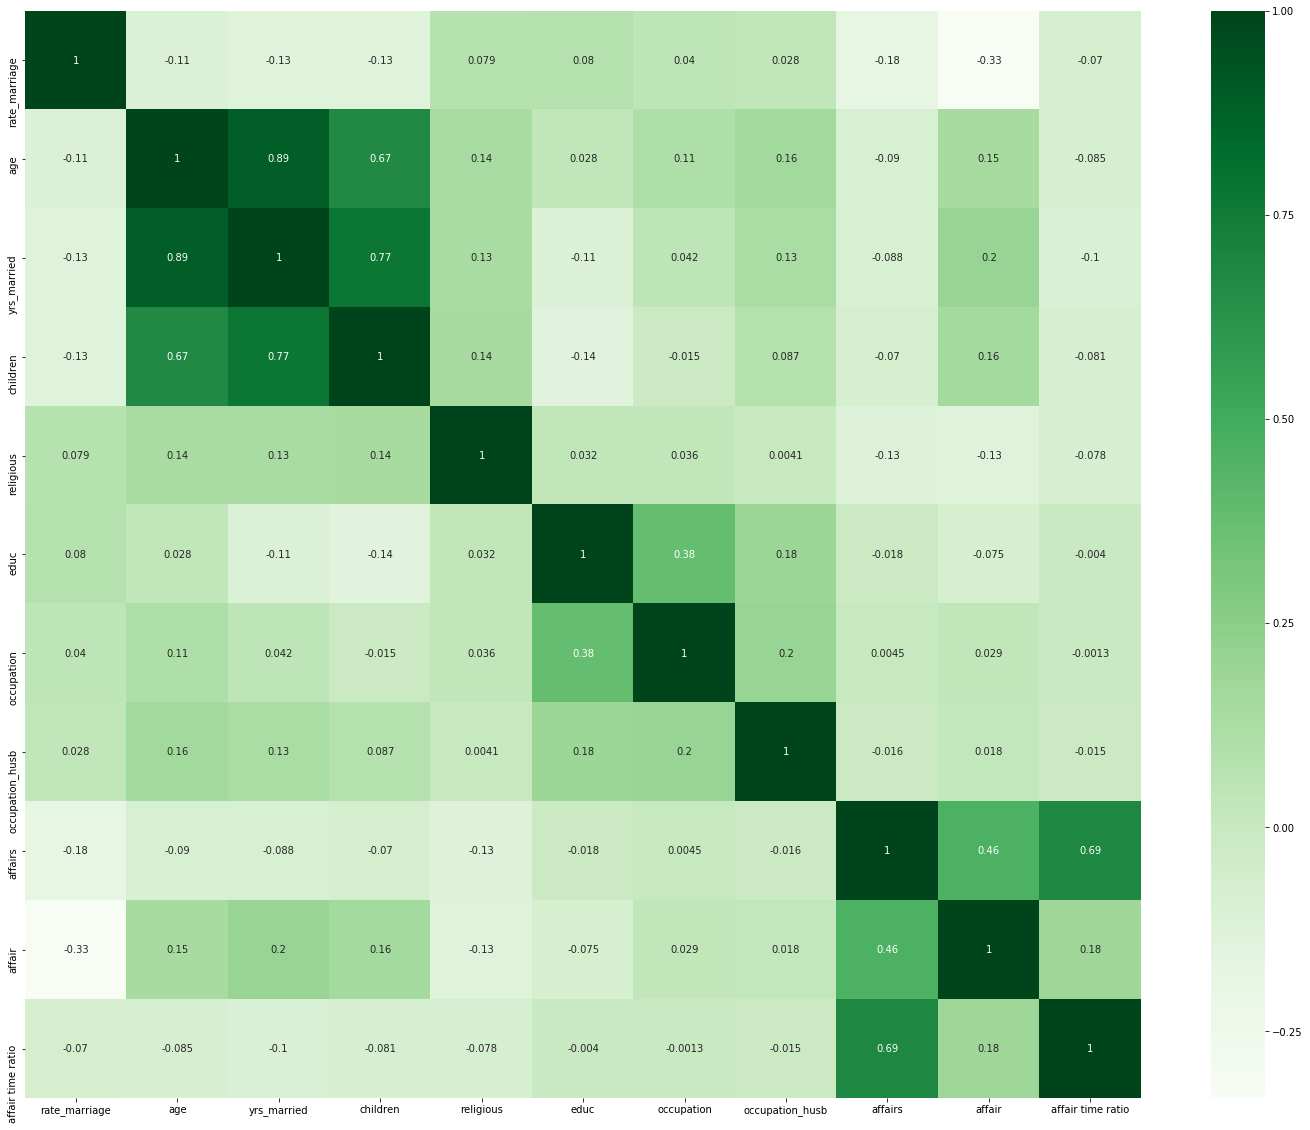

In [26]:
plt.subplots(figsize=(25,20))
sns.heatmap(dta.corr(),cmap="Greens",annot=True)


In [37]:
def createQuantile(df,fieldName):
    dd = pd.qcut(df[fieldName],q=[0, .25, .5, .75, 1.])
    dd = pd.Categorical(dd)
    dd = pd.get_dummies(dd,prefix=fieldName,drop_first=True)
    df = pd.concat([df.drop(fieldName,axis=1,inplace=True),dd],axis=1)
    return df

In [38]:
dta1 = createQuantile(dta,"yrs_married")

In [39]:
dta1 = pd.concat([dta,dta1],axis=1)

In [40]:
dta1.head()

,rate_marriage,age,children,religious,educ,occupation,occupation_husb,affairs,affair,affair time ratio,"yrs_married_(2.5, 6.0]","yrs_married_(6.0, 16.5]","yrs_married_(16.5, 23.0]"
0,3.0,32.0,3.0,3.0,17.0,2.0,5.0,0.111111,1,0.012346,0,1,0
1,3.0,27.0,3.0,1.0,14.0,3.0,4.0,3.230769,1,0.248521,0,1,0
2,4.0,22.0,0.0,1.0,16.0,3.0,5.0,1.400000,1,0.560000,0,0,0
3,4.0,37.0,4.0,3.0,16.0,5.0,5.0,0.727273,1,0.044077,0,1,0
4,5.0,27.0,1.0,1.0,14.0,3.0,4.0,4.666666,1,0.518518,0,1,0


In [41]:
dta.head()

,rate_marriage,age,children,religious,educ,occupation,occupation_husb,affairs,affair,affair time ratio
0,3.0,32.0,3.0,3.0,17.0,2.0,5.0,0.111111,1,0.012346
1,3.0,27.0,3.0,1.0,14.0,3.0,4.0,3.230769,1,0.248521
2,4.0,22.0,0.0,1.0,16.0,3.0,5.0,1.400000,1,0.560000
3,4.0,37.0,4.0,3.0,16.0,5.0,5.0,0.727273,1,0.044077
4,5.0,27.0,1.0,1.0,14.0,3.0,4.0,4.666666,1,0.518518


In [44]:
del dta1["affairs"]
dta1.head()


,rate_marriage,age,children,religious,educ,occupation,occupation_husb,affair,affair time ratio,"yrs_married_(2.5, 6.0]","yrs_married_(6.0, 16.5]","yrs_married_(16.5, 23.0]"
0,3.0,32.0,3.0,3.0,17.0,2.0,5.0,1,0.012346,0,1,0
1,3.0,27.0,3.0,1.0,14.0,3.0,4.0,1,0.248521,0,1,0
2,4.0,22.0,0.0,1.0,16.0,3.0,5.0,1,0.560000,0,0,0
3,4.0,37.0,4.0,3.0,16.0,5.0,5.0,1,0.044077,0,1,0
4,5.0,27.0,1.0,1.0,14.0,3.0,4.0,1,0.518518,0,1,0


In [45]:
y=dta1["affair"]
X=dta1.drop(columns=["affair"])
# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(X, y)

# check the accuracy on the training set
model.score(X, y)

C:\Users\manoj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9191014765944078

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3)
model2 = LogisticRegression()
model2.fit(X_train, y_train)

C:\Users\manoj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [50]:
model2.score(X_train, y_train)

0.90237881508079

In [51]:
model2.score(X_test, y_test)

0.9183246073298429